<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/OpenCV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cv2**.createTracker(track_bar, name, window_name, value, count, on_change): Tracker를 생성하는 함수

- value: 초기 값
- count: Max 값 (Min: 0)
- on_change: 값이 변경될 때 호출되는 Callback 함수

cv2.getTrackerPos(track_bar, name, window_name): Tracker로부터 값을 얻어 오는 함수

## Tracker 객체추적


In [ ]:
# 실행하면 세션이 다운됨 .. 
import cv2
import numpy as np

def change_color(x):
  r = cv2.getTrackbarPos("R", "Image")
  g = cv2.getTrackbarPos("G", "Image")
  b = cv2.getTrackbarPos("B", "Image")
  image[:] = [b, g, r]
  cv2.imshow('Image', image)
  
image = np.zeros((600, 400, 3), np.uint8)
cv2.namedWindow("Image")

cv2.createTrackbar("R", "Image", 0, 255, change_color)
cv2.createTrackbar("G", "Image", 0, 255, change_color)
cv2.createTrackbar("B", "Image", 0, 255, change_color)

cv2.imshow('Image', image)
cv2.waitKey(0)

## 도형그리기 

cv2.line(image, start, end, color, thickness): 하나의 직선을 그리는 함수

- start: 시작 좌표 (2차원)
- end: 종료 좌표 (2차원)
- thickness: 선의 두께

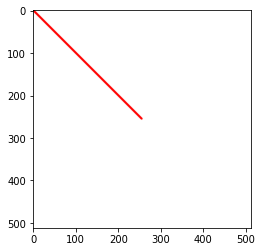

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image= np.full((512,512,3),255,np.uint8)  # np.uint8 부호없는 정수 
image= cv2.line(image,(0,0),(255,255),(255,0,0),3)

plt.imshow(image)
plt.show()

cv2.rectangle(image, start, end, color, thickness): 하나의 사각형을 그리는 함수

- start: 시작 좌표 (2차원)
- end: 종료 좌표 (2차원)
- thickness: 선의 두께 (채우기: -1)

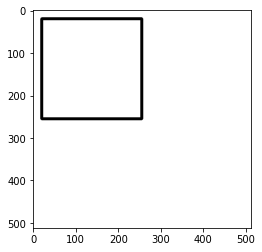

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512,512,3),255, np.uint8) 
image = cv2.rectangle(image,(20,20),(255,255),(0,0,0),5) # 시작/ 끝/ 색RGB 000 검정/ 두께

plt.imshow(image)
plt.show()

cv2.circle(image, center, radian, color, thickness): 하나의 원을 그리는 함수

- center: 원의 중심 (2차원)
- radian: 반지름
- thickness: 선의 두께 (채우기: -1)

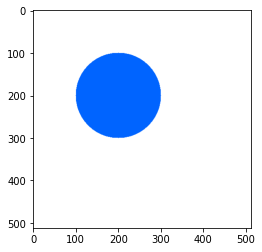

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image= np.full((512,512,3),255, np.uint8)
image= cv2.circle(image,(200,200),100,(0,100,255),-1)

plt.imshow(image)
plt.show()



cv2.polylines(image, points, is_closed, color, thickness): 하나의 다각형을 그리는 함수

points: 꼭지점들
is_closed: 닫힌 도형 여부
thickness: 선의 두께 (채우기: -1)

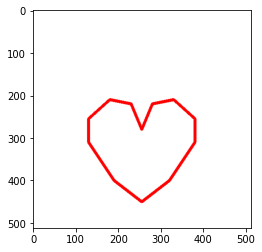

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[255,280],[280,220],[330,210],[380,255],[380,310],[320,400],[255,450],
                   [190,400],[130,310],[130,255],[180,210],[230,220],[255,280]])
image = cv2.polylines(image, [points], True, (255, 0, 0), 5)

plt.imshow(image)
plt.show()  # 기엽죠?ㅋㅋ

cv2.putText(image, text, position, font_type, font_scale, color): 하나의 텍스트를 그리는 함수

- position: 텍스트가 출력될 위치
- font_type: 글씨체
- font_scale: 글씨 크기 가중치

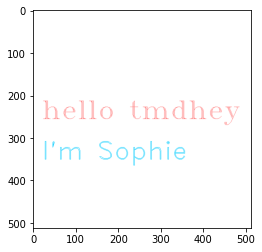

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'hello tmdhey ', (20, 255), cv2.FONT_HERSHEY_TRIPLEX, 2, (255, 128, 128))
image2 = np.full((512, 512, 3), 255, np.uint8)
image2 = cv2.putText(image, 'I\'m Sophie ', (20, 350), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 204, 255))

plt.imshow(image)
plt.imshow(image2)
plt.show()

## Contours

cv2.findContours(image, mode, method): 이미지에서 Contour들을 찾는 함수

- mode: Contour들을 찾는 방법

1) RETR_EXTERNAL: 바깥쪽 Line만 찾기

2) RETR_LIST: 모든 Line을 찾지만, Hierarchy 구성 X

3) RETR_TREE: 모든 Line을 찾으며, 모든 Hierarchy 구성 O

- method: Contour들을 찾는 근사치 방법

1) CHAIN_APPROX_NONE: 모든 Contour 포인트 저장 

2) CHAIN_APPROX_SIMPLE: Contour Line을 그릴 수 있는 포인트만 저장

- 입력 이미지는 Gray Scale Threshold 전처리 과정이 필요합니다.

cv2.drawContours(image, contours, contour_index, color, thickness): Contour들을 그리는 함수

- contour_index: 그리고자 하는 Contours Line (전체: -1)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Paul Gauguin.jpg to Paul Gauguin.jpg


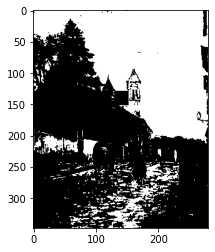

In [10]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('Paul Gauguin.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

In [11]:
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 4) # <<여기서 계속 오류나는데 왜날까요 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

## OpenCV Contours 처리


cv2.boundingRect(contour): Contour를 포함하는 사각형을 그립니다.

- 사각형의 X, Y 좌표와 너비, 높이를 반환합니다.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving 다운로드.png to 다운로드.png


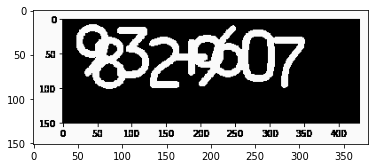

error: ignored

In [14]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('다운로드.png')
image_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray,230,250,0)
thres = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 오류 왜자꾸 나는건지 모르겠는데.. 구글링 해봐도 오류날 이유가 없어요 
# HELP